Quantum Teleportation

In [1]:
import qiskit
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

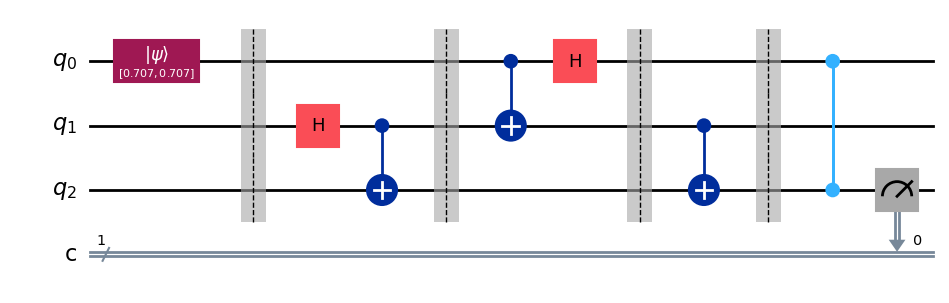

In [5]:
import numpy as np

phi=[np.sqrt(0.5), np.sqrt(0.5)]

tc1=QuantumCircuit(3,1)
tc1.initialize(phi,0)
tc1.barrier()
tc1.h(1)
tc1.cx(1,2)
tc1.barrier()
tc1.cx(0,1)
tc1.h(0)
tc1.barrier()
tc1.cx(1,2)
tc1.barrier()
#tc1.h(2)
#tc1.cx(0,2)
#tc1.h(2)
tc1.cz(0,2)
tc1.measure(2,0)
tc1.draw('mpl')
#tc1.save_statevector()

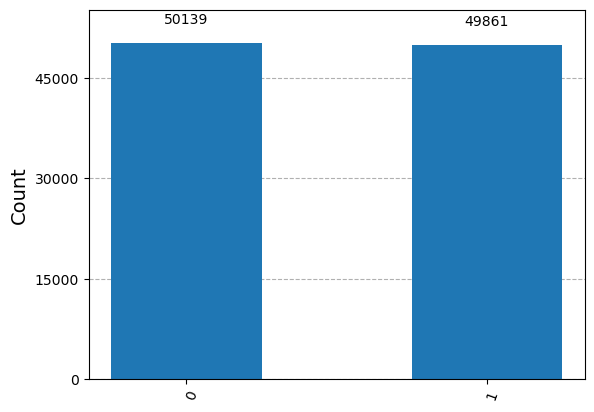

In [7]:
simulator = AerSimulator()
compiled_circuit = transpile(tc1, simulator)
#out_vector = simulator.run(compiled_circuit).result().get_statevector()
counts=simulator.run(compiled_circuit, shots=100000).result().get_counts()
plot_histogram(counts)
#plot_bloch_multivector(out_vector)

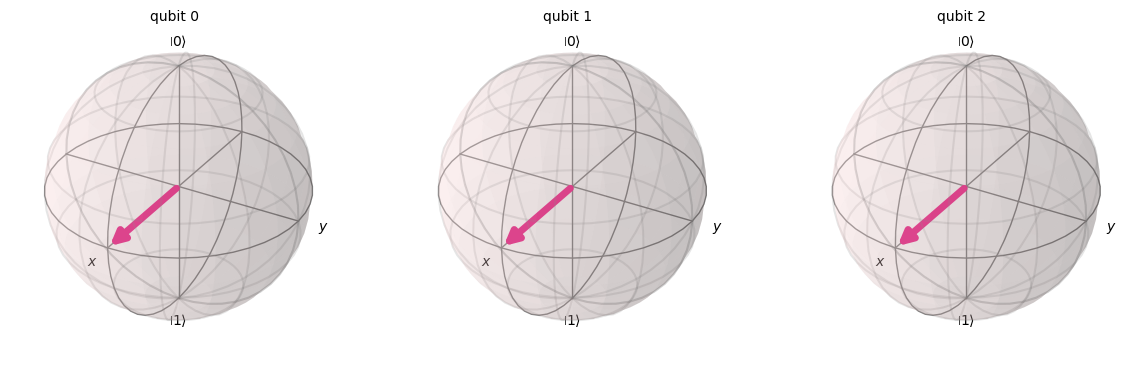

In [8]:
import numpy as np

phi=[np.sqrt(0.5), np.sqrt(0.5)]

tc2=QuantumCircuit(3,1)
tc2.initialize(phi,0)
tc2.barrier()
tc2.h(1)
tc2.cx(1,2)
tc2.barrier()
tc2.cx(0,1)
tc2.h(0)
tc2.barrier()
tc2.cx(1,2)
tc2.barrier()
#tc1.h(2)
#tc1.cx(0,2)
#tc1.h(2)
tc2.cz(0,2)
tc2.save_statevector()
simulator = AerSimulator()
compiled_circuit = transpile(tc2, simulator)
out_vector = simulator.run(compiled_circuit).result().get_statevector()
#counts=simulator.run(compiled_circuit, shots=100000).result().get_counts()
#plot_histogram(counts)
plot_bloch_multivector(out_vector)

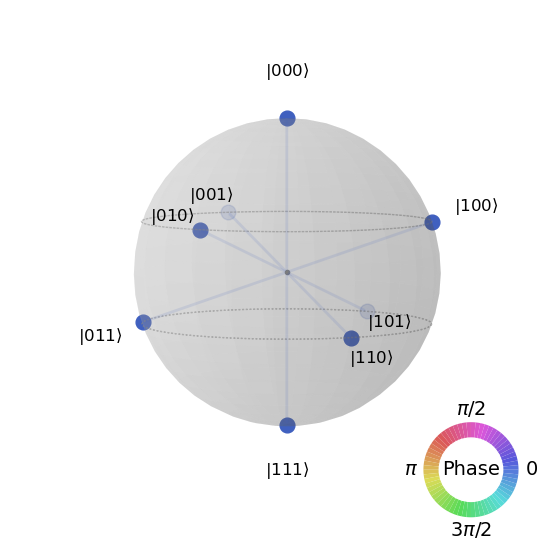

In [11]:
plot_state_qsphere(out_vector)

  Bernstein-Vazirani Algorithm

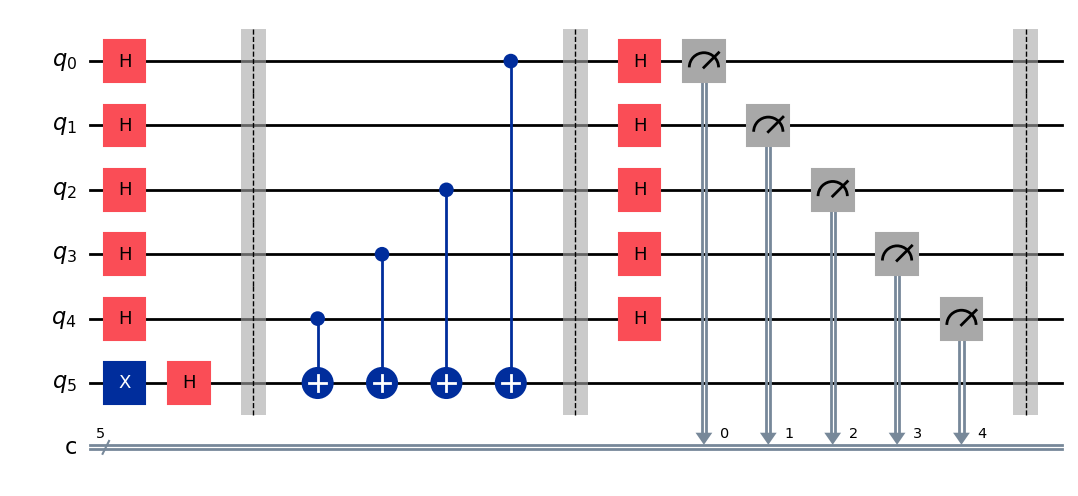

In [14]:
import qiskit
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram 
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

import numpy as np

n=5 #number of qubits used to repersent s
s='11101' # the hidden binary string

bv_circuit=QuantumCircuit(n+1,n) # n qubits + 1 ancilla qubit and n classical bits 

bv_circuit.x(n)
bv_circuit.h(n)

# applying H-gates 
for i in range(n):
    bv_circuit.h(i)

bv_circuit.barrier()

# oracle to implement bit string multiplication
k = n-1
for j in range(n):
    if s[j] == '1':
       bv_circuit.cx(k,n)
    k = k - 1

bv_circuit.barrier()
    
# applying H-gates 
for l in range(n):
    bv_circuit.h(l)

for m in range(n):
    bv_circuit.measure(m,m)

bv_circuit.barrier()
bv_circuit.draw('mpl')

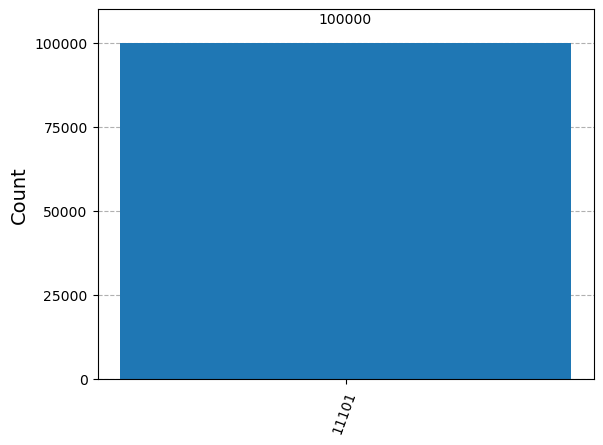

In [16]:
# local simulator
simulator = AerSimulator()
compiled_circuit = transpile(bv_circuit, simulator)

result=simulator.run(compiled_circuit, shots=100000).result().get_counts()
plot_histogram(result)

Deutsch-Jozsa Algorithm

In [19]:
import qiskit
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram 
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

import numpy as np

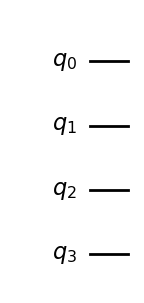

In [21]:
n=3 
f0allx = QuantumCircuit(n+1) # constant oracle for f(x)=0 for all x
f0allx.draw('mpl')

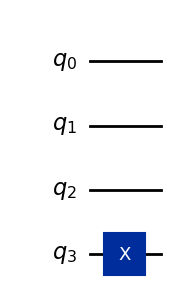

In [23]:
n=3
f1allx = QuantumCircuit(n+1) # constant oracle for f(x) = 1 for all x
f1allx.x(n)
f1allx.draw('mpl')

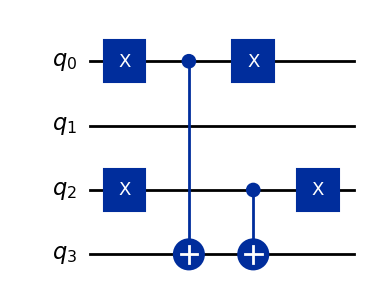

In [25]:
n=3
f01halfx=QuantumCircuit(n+1) # Balanced oracel f(x)=0 for half and f(x)=1 for other half
xgates="101"
cxgates="101"

# implementig X gates before CX gates 
for i in range(n):
    if xgates[i] == '1':
        f01halfx.x(i)

# placing CX gates to give phase at desired combination 
for j in range(n):
    if cxgates[j] == '1':
        f01halfx.cx(j,n)

# placing X gate again to revert to original inputs on 0 to n-1 qubits
for k in range(n):
    if xgates[k] == '1':
        f01halfx.x(k)
 
f01halfx.draw('mpl')

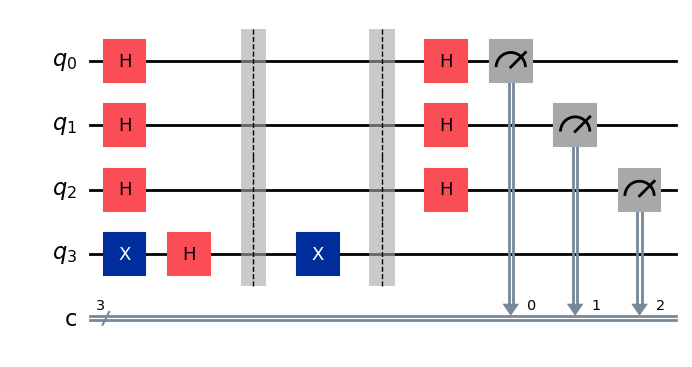

In [27]:
n=3 
dj=QuantumCircuit(n+1,n)
# apllying H-gates 
for q in range(n):
    dj.h(q)

# putting ancilia in state |->
dj.x(n)
dj.h(n)
dj.barrier()

# adding oracle
dj &= f1allx
dj.barrier()

# repeating H-gates
for q in range(n):
    dj.h(q)

# measuring
for l in range(n):
    dj.measure(l,l)

dj.draw('mpl')

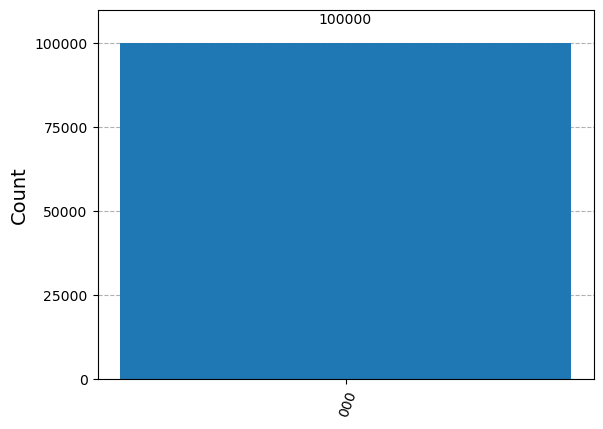

In [29]:
# local simulator
simulator = AerSimulator()
compiled_circuit = transpile(dj, simulator)

result=simulator.run(compiled_circuit, shots=100000).result().get_counts()
plot_histogram(result)

Quantum Fourier Transform and Inverse Fourier Transform 

In [32]:
import qiskit 
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator 
import numpy as np

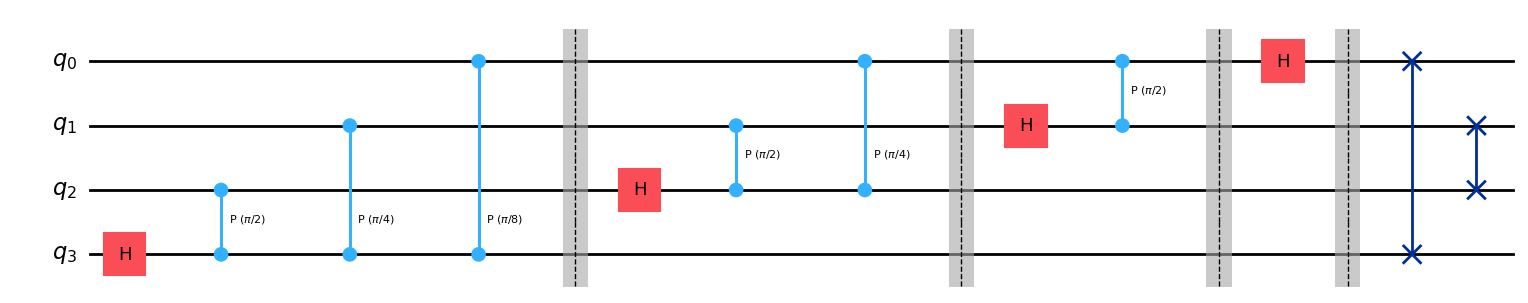

In [34]:
#QFT
n=4 # no. of qubits
qftn=QuantumCircuit(n,name='QFT')

for i in range(n-1,-1,-1):
    qftn.h(i)
    p=0
    for j in range(i):
        p+=1
        qftn.cp(np.pi/2**p,i-j-1,i) #controlled phase gates, control qubit is i-j-1
    qftn.barrier()
for i in range(int(n/2)):
    qftn.swap(i,n-1-i) # swap gate

qftn.draw('mpl')

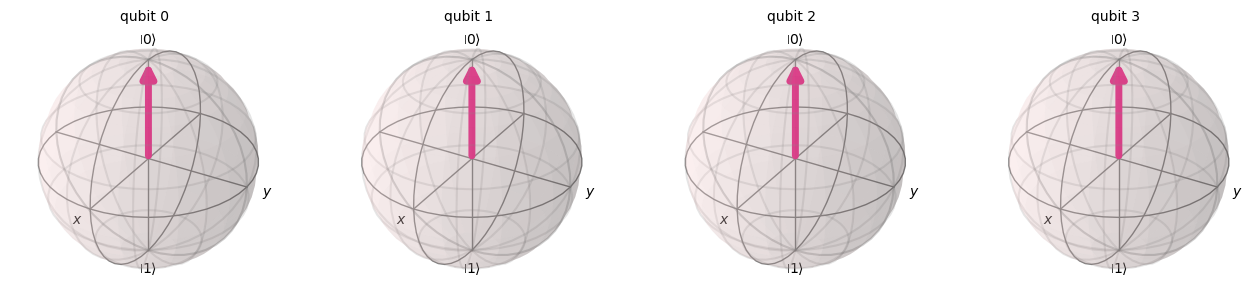

In [36]:
sv=Statevector.from_label('0000')
plot_bloch_multivector(sv)

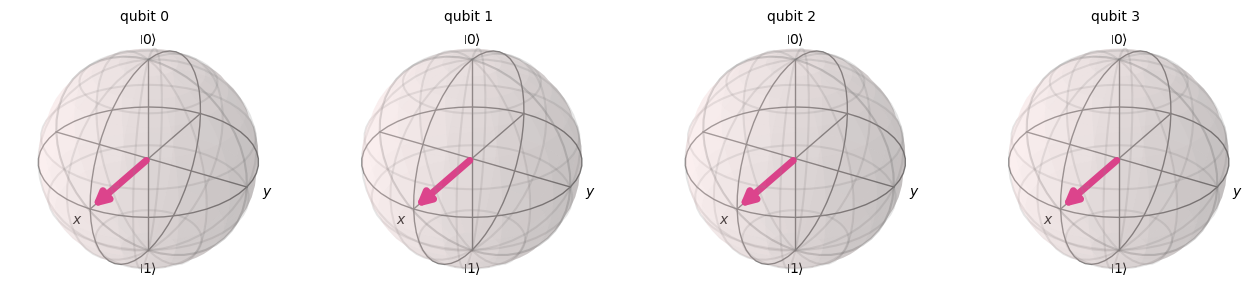

In [38]:
new_sv=sv.evolve(qftn)
plot_bloch_multivector(new_sv)

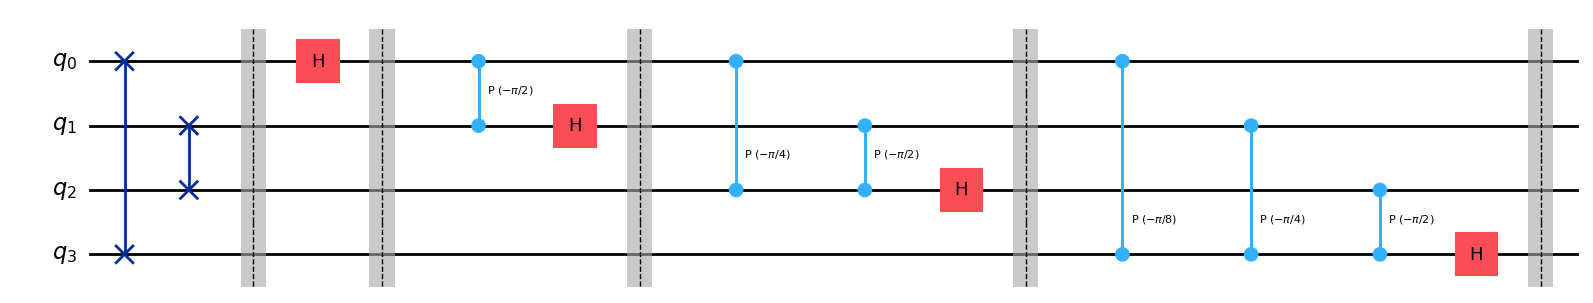

In [40]:
#IQFT
n=4 # no. of qubits
iqftn=QuantumCircuit(n,name='IQFT')

for i in range(int(n/2)):
    iqftn.swap(i,n-1-i) 

iqftn.barrier()
    
for i in range(n):
    p=i+1
    for j in range(i):
        p-=1
        iqftn.cp(-(np.pi)/2**(p),j,i) 
    iqftn.h(i)
    iqftn.barrier()
iqftn.draw('mpl')

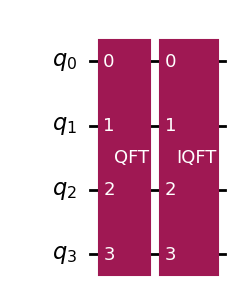

In [42]:
# Identity Operation using QFT and IQFT
n=4 
In=QuantumCircuit(n)
In.append(qftn, range(n))
In.append(iqftn, range(n))
In.draw('mpl')

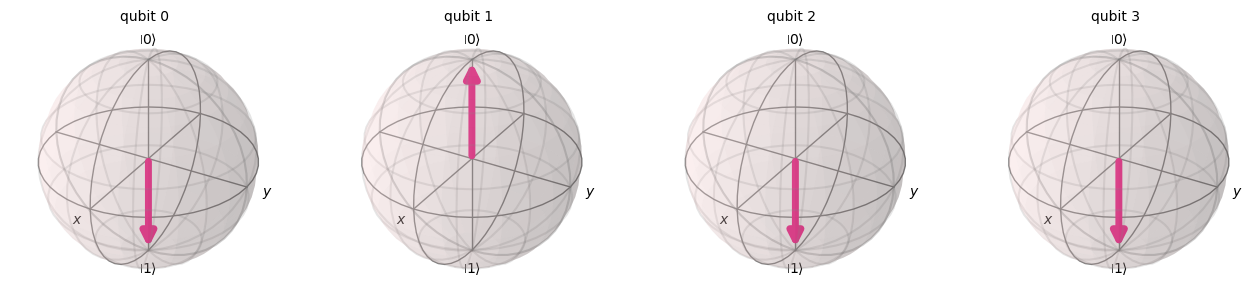

In [44]:
sv1=Statevector.from_label('1101')
newsv1=sv1.evolve(In)
plot_bloch_multivector(newsv1)

Grover's Algorithm

In [47]:
import qiskit
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram 
from qiskit_aer import AerSimulator
import numpy as np

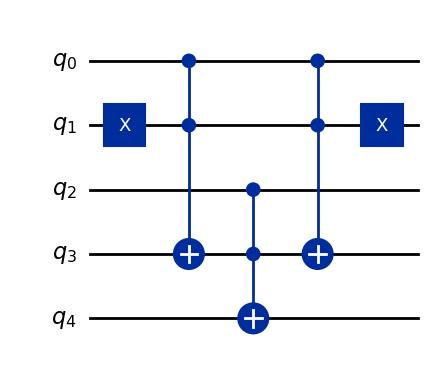

In [49]:
# phase oracle
uf=QuantumCircuit(5)
uf.x(1)
uf.ccx(0,1,3)
uf.ccx(2,3,4)
uf.ccx(0,1,3)
uf.x(1)
uf.draw('mpl')

In [51]:
def phase_oracle(n, name = 'uf'):
    uf=QuantumCircuit(n,name=name)
    uf.x(1)
    uf.ccx(0,1,3)
    uf.ccx(2,3,4)
    uf.ccx(0,1,3)
    uf.x(1)
    return uf   

In [53]:
def diffuser(n,name = 'dif'):
    dif=QuantumCircuit(n,name=name)
    dif.h(range(3)) #first layer of H-gate in diffuser
    dif.x(range(3))
    dif.ccx(0,1,3)
    dif.ccx(2,3,4)
    dif.ccx(0,1,3)
    dif.x(range(3))
    dif.h(range(3)) #second layer of H-gate in diffuser
    return dif  

r= 2


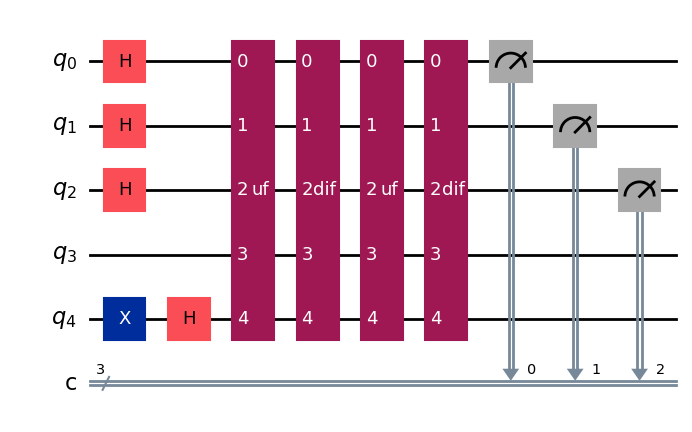

In [55]:
n=5
gr=QuantumCircuit(n,n-2)
n_sol=1 #number of solutions

r = int(np.floor(np.pi/4*np.sqrt(2**(n-2)/n_sol)))
print('r=',r)

gr.h(range(n-2)) # H-gates to all qubits

#putting ancilla in |-> state
gr.x(n-1)
gr.h(n-1)

# applying r rounds of phase oracle and diffuser 
for i in range(r):
     gr.append(phase_oracle(n), range(n))           
     gr.append(diffuser(n), range(n))

gr.measure(range(n-2),range(n-2))
gr.draw('mpl')

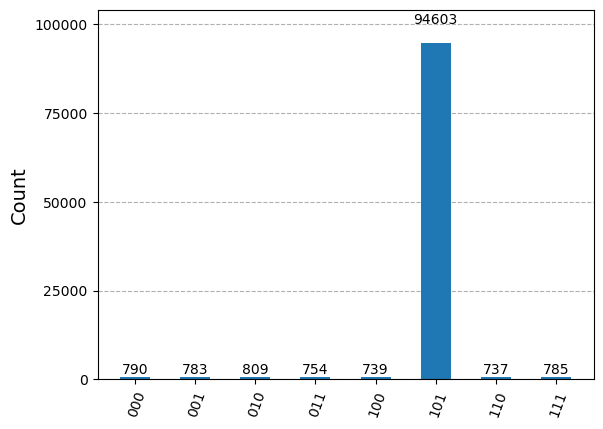

In [57]:
# local simulator
simulator = AerSimulator()
compiled_circuit = transpile(gr, simulator)

result=simulator.run(compiled_circuit, shots=100000).result().get_counts()
plot_histogram(result)

Simon's Algorithm

In [60]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np 

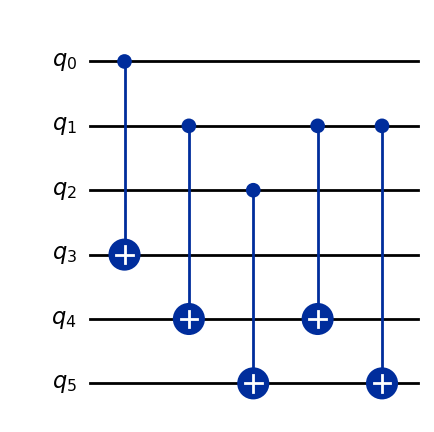

In [62]:
# simon oracle 
n=3
bs='110'
so=QuantumCircuit(2*n)
for i in range(n):
     so.cx(i,i+n)


a=0
for j in range(n-1,-1,-1):
    if bs[j]=='1':
        #so.x(j) we can also put x gate here to get another simon oracle
        m=n
        for k in range(n-1,-1,-1):
            if bs[k]=='1':
                so.cx(a,m)
            m+=1
        #so.x(j) we can also put x gate here to get another simon oracle    
        break     
    a+=1
so.draw('mpl')

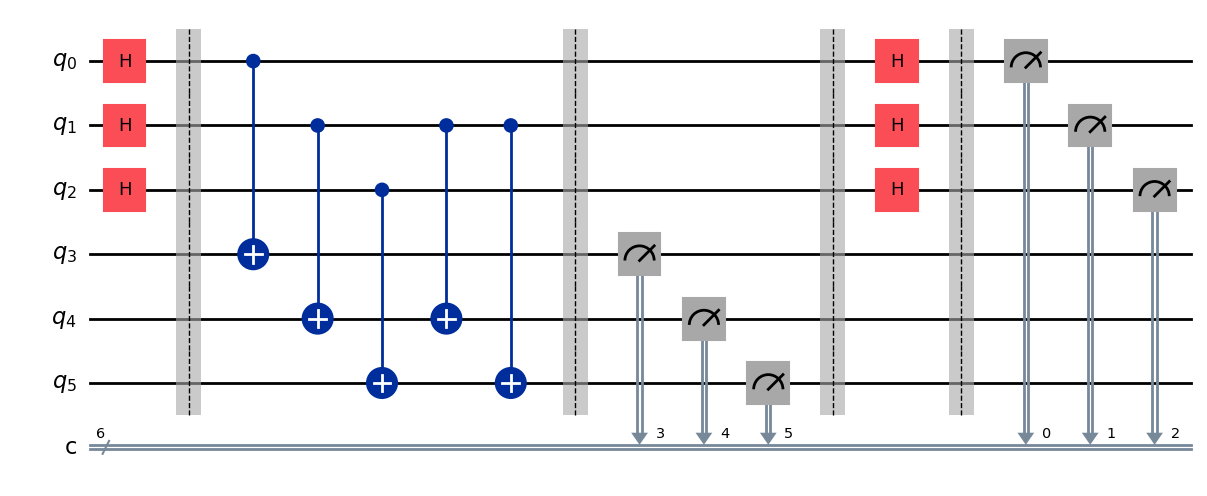

In [64]:
n=3
simon= QuantumCircuit(2*n,2*n)
simon.h(range(n))
simon.barrier()

# putting simon oracle
simon=simon & so

simon.barrier()
i=n
for k in range(n):
    simon.measure(i,i)
    i+=1
simon.barrier() 
simon.h(range(n))
simon.barrier()   
simon.measure(range(n),range(n))

simon.draw('mpl')

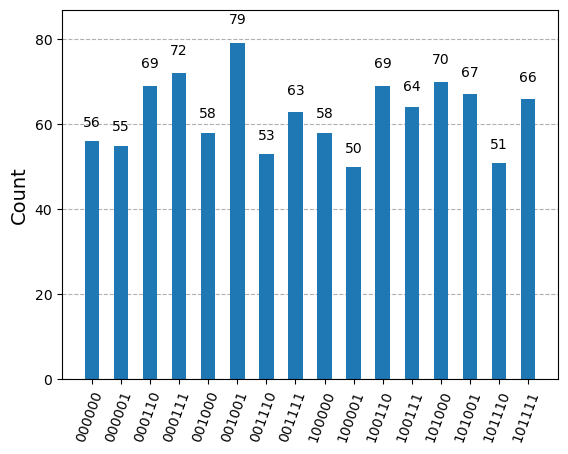

In [66]:
#local simulator
simulator=AerSimulator()
compiled_circuit = transpile(simon, simulator)
result=simulator.run(compiled_circuit, shots=1000).result().get_counts()
plot_histogram(result)

The measurment result of first three qubits are $000, 001, 110 \text{ and } 111.$
$~bs~=~p_2~p_1~p_0$ from the measurment result $p_0~=~0$ and $p_1~+~p_2~=~0$ so, there are two cases $bs~=~000$ and  $bs~=~110$.

In [69]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT

import numpy as np

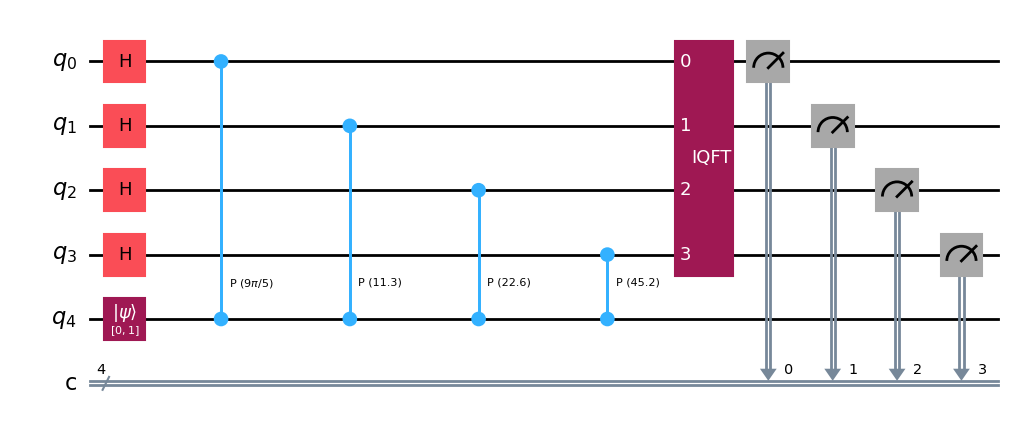

In [71]:
b=4
n=1
qpe=QuantumCircuit(b+n,b)

for i in range(b):
    qpe.h(i)
    
int_sv=[0,1]
qpe.initialize(int_sv,b+n-1)

theta = 0.9

for j in range(b):
    p=2**(j)
    qpe.cp(2*np.pi*theta*p,j,b+n-1)

qpe.append(QFT(b).inverse(), range(b)) 

for k in range(b):
    qpe.measure(k,k)
    
qpe.draw('mpl')

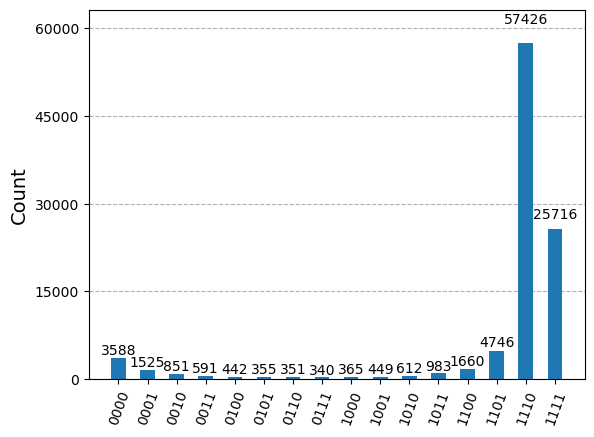

In [73]:
# local simulator
simulator = AerSimulator()
compiled_circuit = transpile(qpe, simulator)

counts=simulator.run(compiled_circuit, shots=100000).result().get_counts()
plot_histogram(counts)

In [75]:
import operator
higest_probability_outcome = max(counts.items(), key=operator.itemgetter(1))[0]
higest_probability_outcome

'1110'

In [77]:
measured_theta = int(higest_probability_outcome, 2)/2**b
print("using ", n, "qubit with theta = ",theta, ", measured_theta = ", measured_theta)

using  1 qubit with theta =  0.9 , measured_theta =  0.875
